# EX-1: Project Proposal

#### Project Title: 
Job Shop scheduling (optimization)
#### Description:
Job shop scheduling or the job-shop problem (JSP) is an optimization problem in computer science and operations research in which ideal jobs are assigned to resources at particular times. The most basic version is as follows: We are given n jobs J1, J2, ..., Jn of varying processing times, which need to be scheduled on m machines with varying processing power, while trying to minimize the makespan. The makespan is the total length of the schedule (that is, when all the jobs have finished processing). 
By:(Wiki)

#### Brief motivation and challenge description
JSP is an NP-Hard problem like TSP. Applying machine learning to job schedulling is an emerging field in computer science. Basically its same as AI determines optimizations without human assistance.
#### Allocation of the 2-3 people to tasks and hours. (N.N., M.M, K.K.)
The Gant chart is shown below.
#### Description of the envisioned end results that would go to the project report/poster.
A breif overview of the optimization methods for Job Shop schedulling. The experiements and the results.


#### Gantt Chart

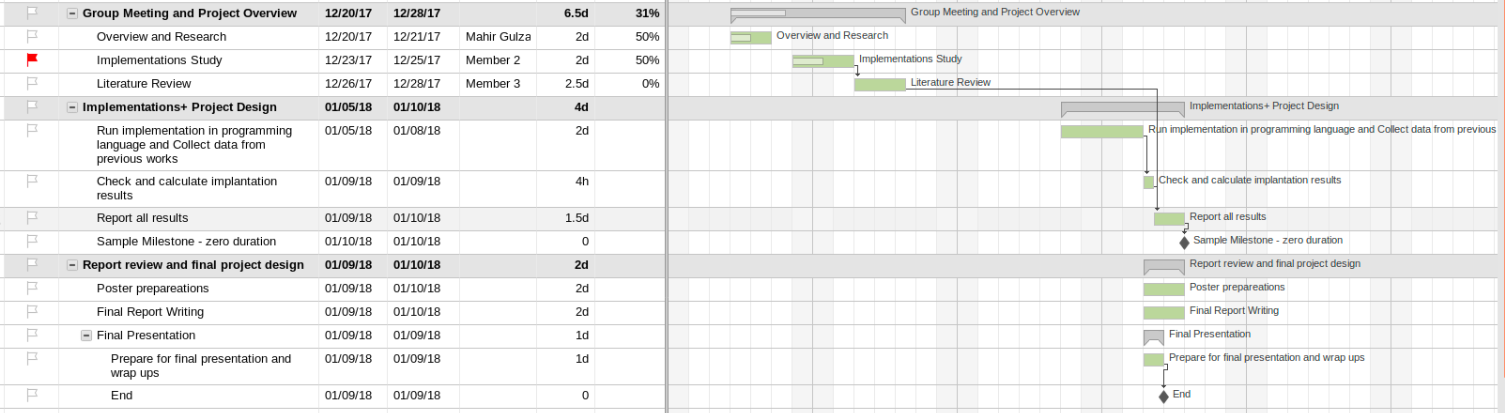

In [107]:
from IPython.display import Image
Image(filename='Project Gantt Chart.png')

# EX-2: Nearest Neighbour TSP

### Description:

The following code calculates the Travelling salesman path considering the nearest neighbour of the given points on a euclidean space.
I have calcualted and reported the swog code format of the points for three files 20, 100 and 1000 cities.

In [306]:
from collections import defaultdict

filename ="/home/mahir/Downloads/TSP Cities/2017/2017/TSP_20.txt"
Nodes=[]

with open(filename) as f:
    for word in f.readlines():
        #print(word.split()[0],word.split()[1])
        templist  =[]
        templist.append(int(word.split()[0]))
        templist.append(int(word.split()[1]))
        Nodes.append(templist)
#         print(Nodes)

points_dict={}
for i in range(len(Nodes)):
    points_dict.setdefault(str(Nodes[i]),"p"+str(i))
    temparray = Nodes[i]
    print("fcircle "+str(temparray[0])+","+str(temparray[1])+" 3 :"+points_dict[str(Nodes[i])])
    

fcircle 512,907 3 :p0
fcircle 573,93 3 :p1
fcircle 34,332 3 :p2
fcircle 147,356 3 :p3
fcircle 441,860 3 :p4
fcircle 628,957 3 :p5
fcircle 896,360 3 :p6
fcircle 607,118 3 :p7
fcircle 667,481 3 :p8
fcircle 144,695 3 :p9
fcircle 918,321 3 :p10
fcircle 651,26 3 :p11
fcircle 303,652 3 :p12
fcircle 977,890 3 :p13
fcircle 795,638 3 :p14
fcircle 140,649 3 :p15
fcircle 359,747 3 :p16
fcircle 640,909 3 :p17
fcircle 285,854 3 :p18
fcircle 578,737 3 :p19


In [307]:
import doctest
from itertools import permutations


def distance(point1, point2):
    """
    Returns the Euclidean distance of two points in the Cartesian Plane.

    >>> distance([3,4],[0,0])
    5.0
    >>> distance([3,6],[10,6])
    7.0
    """
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5


def total_distance(points):
    """
    Returns the length of the path passing throught
    all the points in the given order.

    >>> total_distance([[1,2],[4,6]])
    5.0
    >>> total_distance([[3,6],[7,6],[12,6]])
    9.0
    """
    return sum([distance(point, points[index + 1]) for index, point in enumerate(points[:-1])])



In [308]:
def Find_Min(point,nodelist):
    all_distances=[]
    for i in range(len(nodelist)):
        all_distances.append(distance(point,nodelist[i]))
        #print(all_distances[i])
    
    #print("Min of above ",min(all_distances))
    index = all_distances.index(min(all_distances))
    return nodelist[index]

Visited =[]
Visited_Score=[]
def Nearest_Neighbour(Nodes,Start,shrinkNodes):
    shrinkNodes.remove(Start)
    Visited.append(str(Start))
    Visited_Score.append(Start)
#     print(Start)
    if(len(shrinkNodes) is 0):
#         print("Completed")
        return None
    
#     print(points_dict[str(Start)])
#     print("len of shrink",len(shrinkNodes))
    newStart = Find_Min(Start,shrinkNodes)
    Nearest_Neighbour(Nodes,newStart,shrinkNodes)
    

Nearest_Neighbour(Nodes,Nodes[0],Nodes)    

for i in range(len(Visited)):
    
    if(i==len(Visited)-1):
        print("line ("+points_dict[str(Visited[i])]+") ("+points_dict[str(Visited[0])]+")")
        break
    else:
        print("line ("+points_dict[str(Visited[i])]+") ("+points_dict[str(Visited[i+1])]+")")

line (p0) (p4)
line (p4) (p16)
line (p16) (p12)
line (p12) (p15)
line (p15) (p9)
line (p9) (p18)
line (p18) (p19)
line (p19) (p17)
line (p17) (p5)
line (p5) (p13)
line (p13) (p14)
line (p14) (p8)
line (p8) (p6)
line (p6) (p10)
line (p10) (p7)
line (p7) (p1)
line (p1) (p11)
line (p11) (p3)
line (p3) (p2)
line (p2) (p0)


In [277]:
total_distance(Visited_Score)

9241.709718608257

## Swog 20 Cities

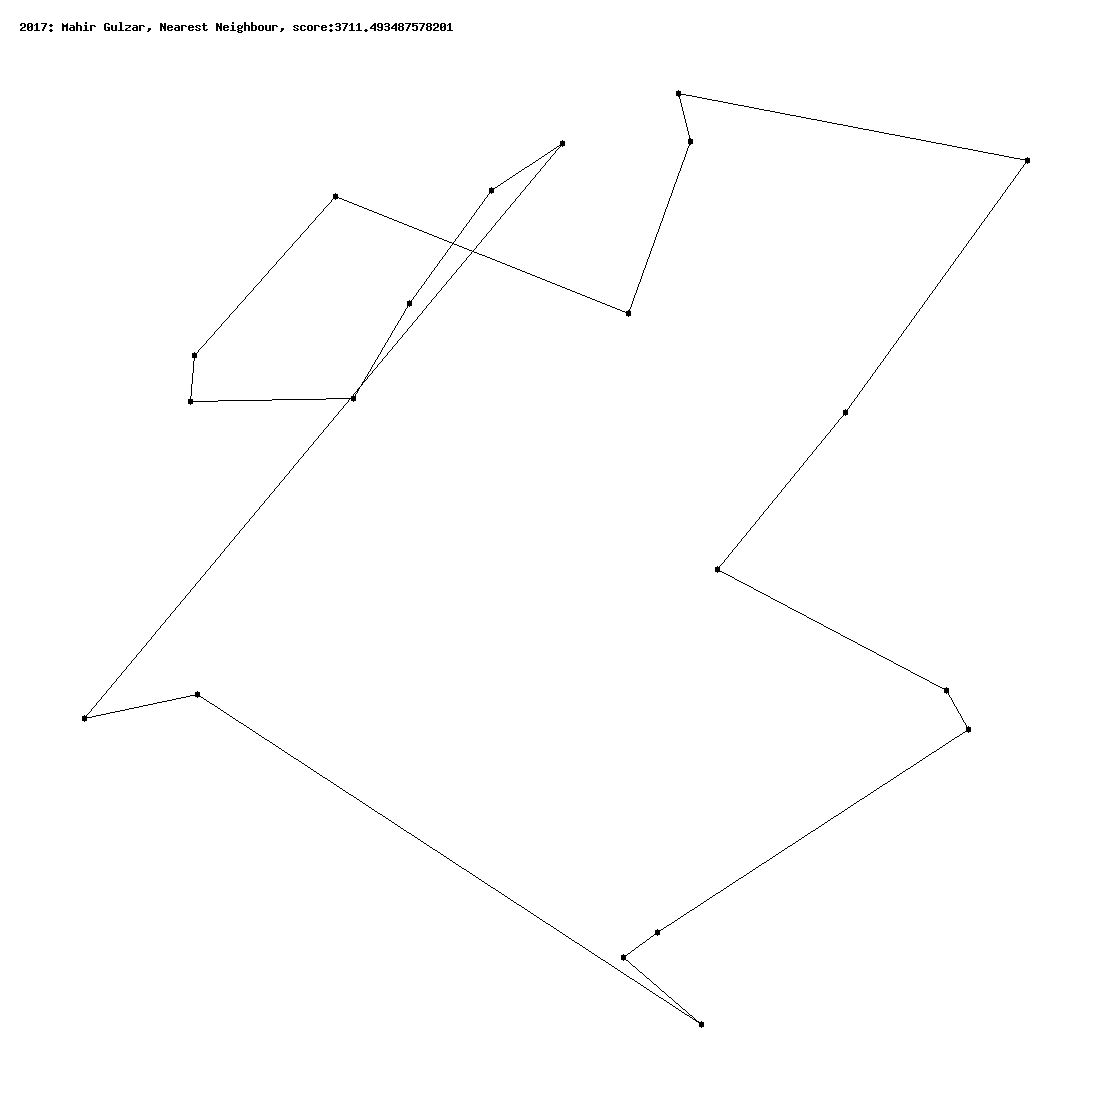

In [94]:
from IPython.display import Image
Image(filename='SWOG_20_Cities.png')

## Swog 100 Cities

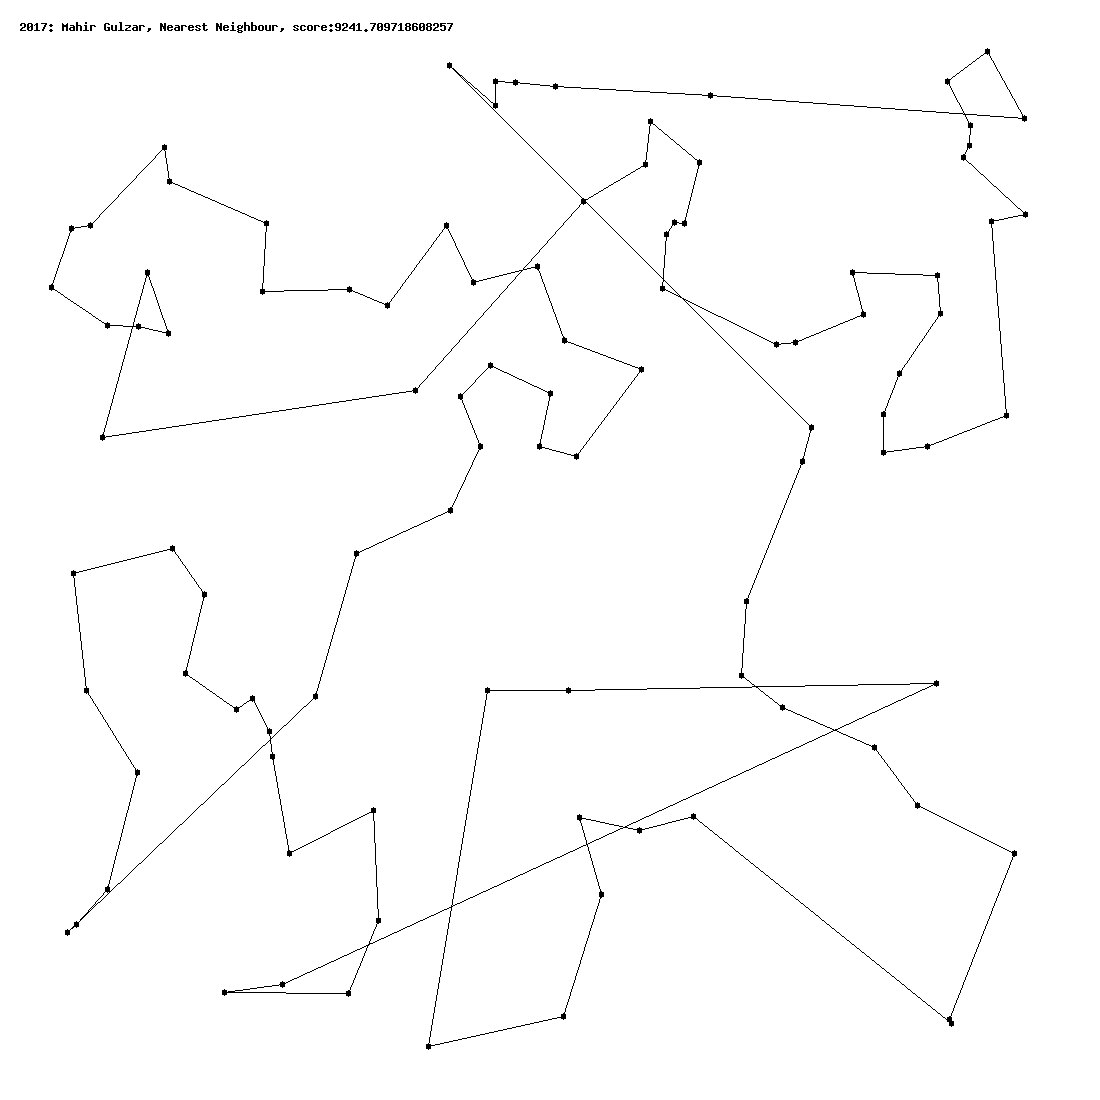

In [95]:
from IPython.display import Image
Image(filename='SWOG_100_Cities.png')

## Swog 1000 Cities

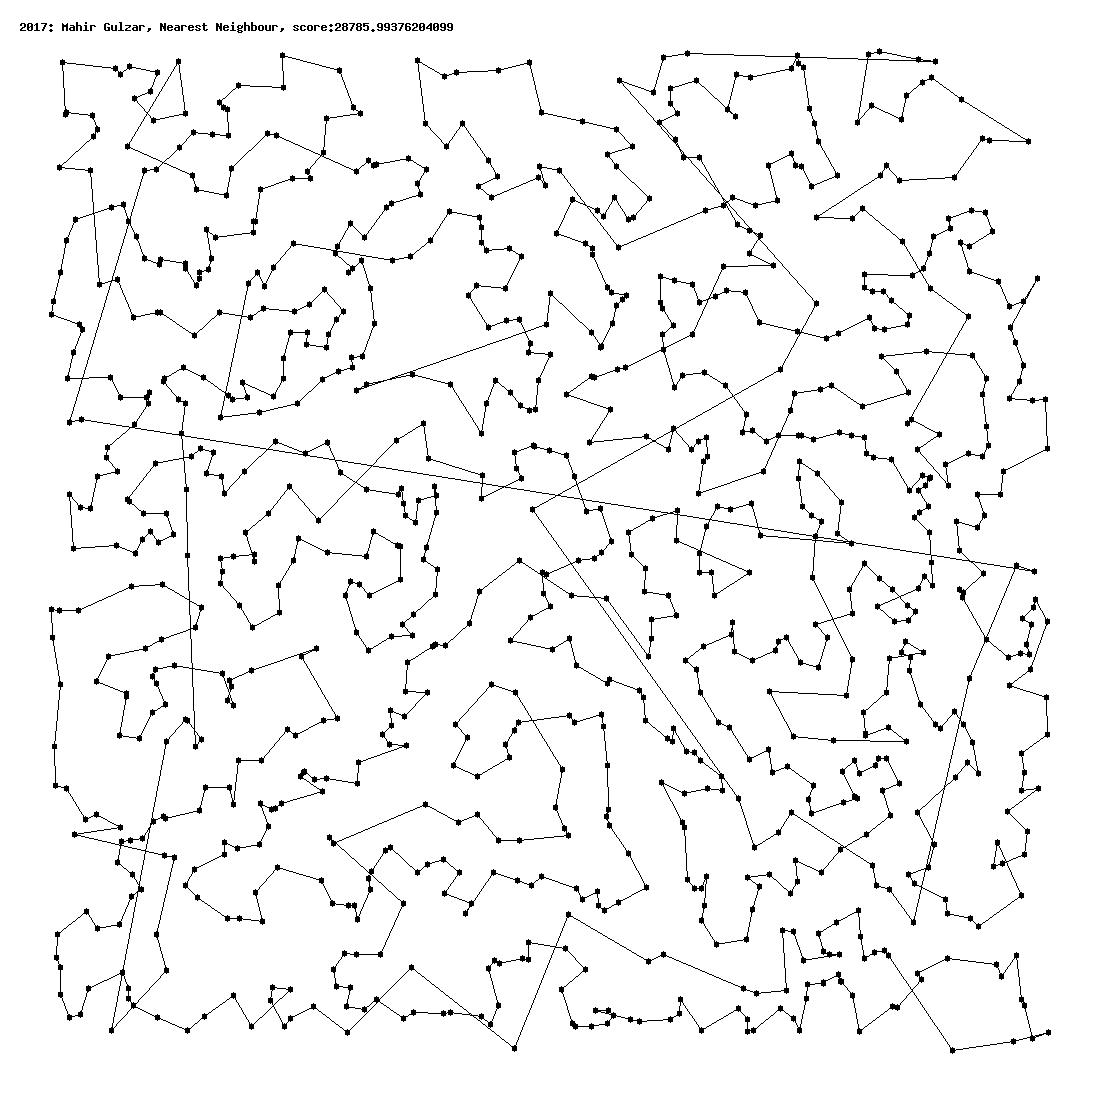

In [96]:
from IPython.display import Image
Image(filename='SWOG_1000_Cities.png')

# EX-3, Ex-4 & Ex-5: TSP (Optimization)  By Genetic Algorithm

In [288]:
# Current Best score by NN is Visited Score order.
import random
class Population(object):
    tours = []
    
    def __init__(self,size,initialize,current_Best=[]):
        
        tours=[None]*size
#         print(current_Best)
        if(initialize):
            self.tours.append(current_Best)
            for i in range(1,size):
                self.tours.append(self.randomize_current(current_Best))
            
            #print(self.tours[2])
            
    
    def getFittest(self):
        all_distances = []
        for i in range (len(self.tours)):
            all_distances.append(total_distance(self.tours[i]))
        
        index = all_distances.index(min(all_distances))
        return self.tours[index]
        
        
    
    def randomize_current(self,current_Best):
#         random.sample(x, len(x))
        return random.sample(current_Best, len(current_Best))
        
        
#


In [302]:

mutationRate = 0.015;
tournamentSize = 5;
elitism = True;



# // Selects candidate tour for crossover
def tournamentSelection(pop):
    global tornamentSize
#     // Create a tournament population
    tournament = Population(tournamentSize, False)
#     // For each place in the tournament get a random candidate tour and
#     // add it
    for i in range(tournamentSize):
        randomId = random.randint(0, len(pop.tours)-1)
        tournament.tours[i]= pop.tours[randomId]
    
#     // Get the fittest tour
    fittest = tournament.getFittest()
    return fittest;

#------------------------------------------------------------------------


# // Applies crossover to a set of parents and creates offspring
def crossover(parent1, parent2):
#     // Create new child tour
    child = [None]*999

#     // Get start and end sub tour positions for parent1's tour
    startPos = random.randint(0, len(parent1)-1)
    endPos = random.randint(0, len(parent1)-1)
    
#     print("parent1 =",parent1)
#     print("parent2 =",parent2)

#     // Loop and add the sub tour from parent1 to our child
    for i in range (len(child)):
#         // If our start position is less than the end position
        if (startPos < endPos and i > startPos and i < endPos):
            child[i]=parent1[i]
#         } // If our start position is larger
        elif (startPos > endPos): 
            if (not(i < startPos and i > endPos)):
                child[i]=parent1[i]
            
        

    for i in range(len(child)):
        if(child[i] == None):
            for j in parent2:
                if(j not in child):
                    child[i]=j
                    
    #print(child)
    
    return child



#-----------------------------------------------------------------------



# // Mutate a tour using swap mutation
def mutate(tour):
#     // Loop through tour cities
    for tourPos1 in range(len(tour)):
    #         // Apply mutation rate
        if(random.uniform(0, 1) < mutationRate):
    #             // Get a second random position in the tour
            tourPos2 = random.randint(0, len(tour)-1)

    #             // Get the cities at target position in tour
            city1 = tour[tourPos1]
            city2 = tour[tourPos2]


    #             // Swap them around

            tour[tourPos2] = city1
            tour[tourPos1] = city2



#------------------------------------------------------------------------


#Evolves a population over one generation
def evolvePopulation(pop):
    newPopulation = Population(len(pop.tours), False)

#     // Keep our best individual if elitism is enabled
    elitismOffset = 0
    if (elitism):
        newPopulation.tours[0]= pop.getFittest()
        elitismOffset = 1
    

#     // Crossover population
#     // Loop over the new population's size and create individuals from
#     // Current population
    #for i in range (elitismOffset,len(newPopulation.tours)):
    for i in range (elitismOffset,50):
#     for i in range (1):
#         // Select parents
        
        parent1 = tournamentSelection(pop)
        parent2 = tournamentSelection(pop)
#         print(len(parent1))
#         // Crossover parents
        child = crossover(parent1, parent2)
#         // Add child to new population
        newPopulation.tours[i]=child
    

#     // Mutate the new population a bit to add some new genetic material
    for i in range(elitismOffset,len(newPopulation.tours)):
        mutate(newPopulation.tours[i])
                   
    return newPopulation

#     return newPopulation;



In [310]:
p = Population(50,True,Visited_Score)
p = evolvePopulation(p)


for i in range(10):
    p = evolvePopulation(p);
    
# print("finished...")
print(p.getFittest())

[[512, 907], [441, 860], [359, 747], [303, 652], [918, 321], [144, 695], [285, 854], [578, 737], [640, 909], [628, 957], [977, 890], [795, 638], [667, 481], [896, 360], [140, 649], [607, 118], [573, 93], [651, 26], [147, 356], [34, 332]]


In [313]:
print(total_distance(p.getFittest)


3555.1792472463


### Description Ex3-Ex4:

I used the Genetic Algorithm optimization for TSP.
Firstly I started with 1000 nodes but it was taking alot of time, So I used the less cities data and ran the algorithm on 20 cities. It gave the optimal answer in about 3 secs. The Nearest neighbour gave 3711 distance score while the Genetic algorithm gave 3555 optimal score. But it was comparatively slower.

I guess for future work I will the genetic algorithm further to get more time effective results.

### Description Ex5:

The genetic algorithm goes into the root of optimization. It sets a parameter of fittness and populates offsprings from the fittest of previous generation. Offspring are made by crossover and mutation of previously generated optimal values according to the fittness. In the case of TSP the fitness was the shortest distance covered by the salesman in travelling through the cities.
As I mentioned previously the thousand nodes were taking alot of time and then I tested it on 20 and 100 cities. The time taken by 20 cities was 3 secs for 100 cycles and for 100 cities it was arround 20 secs for 100 cycles and for 1000 cities it was about 3 minutes.
Surprisingly this optimization wasn't better than the nearest neighbour for big dataset.
The swog images are reported below.


In [314]:
newNodes=p.getFittest()
for i in range(len(newNodes)):
    
    if(i==len(newNodes)-1):
        print("line ("+points_dict[str(newNodes[i])]+") ("+points_dict[str(newNodes[0])]+")")
        break
    else:
        print("line ("+points_dict[str(newNodes[i])]+") ("+points_dict[str(newNodes[i+1])]+")")

line (p0) (p4)
line (p4) (p16)
line (p16) (p12)
line (p12) (p10)
line (p10) (p9)
line (p9) (p18)
line (p18) (p19)
line (p19) (p17)
line (p17) (p5)
line (p5) (p13)
line (p13) (p14)
line (p14) (p8)
line (p8) (p6)
line (p6) (p15)
line (p15) (p7)
line (p7) (p1)
line (p1) (p11)
line (p11) (p3)
line (p3) (p2)
line (p2) (p0)


## Swog 20 Cities by (Genetic Algorithm)

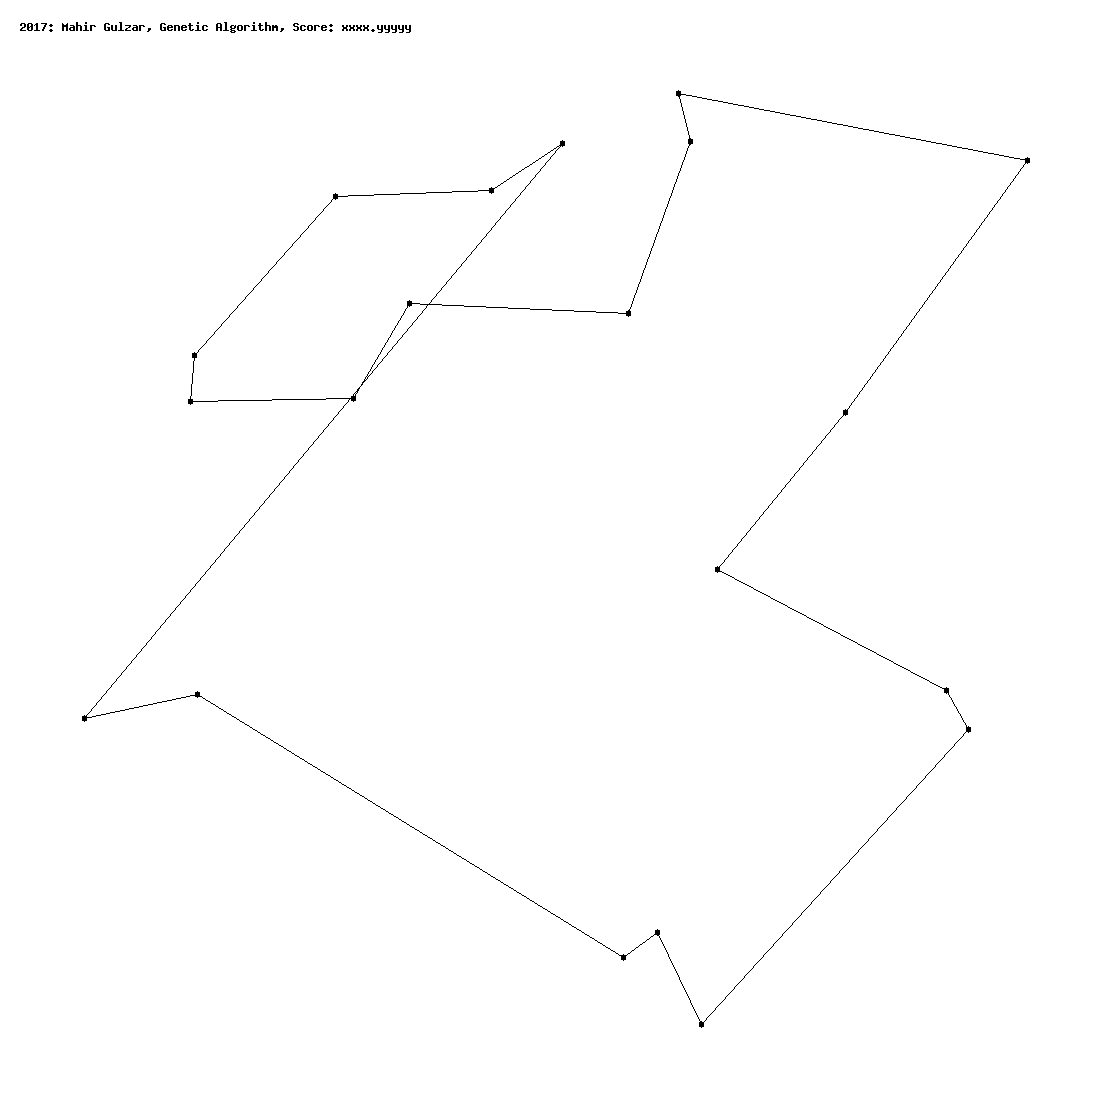

In [281]:
from IPython.display import Image
Image(filename='GA_20.png')

## Swog 100 Cities by (Genetic Algorithm)

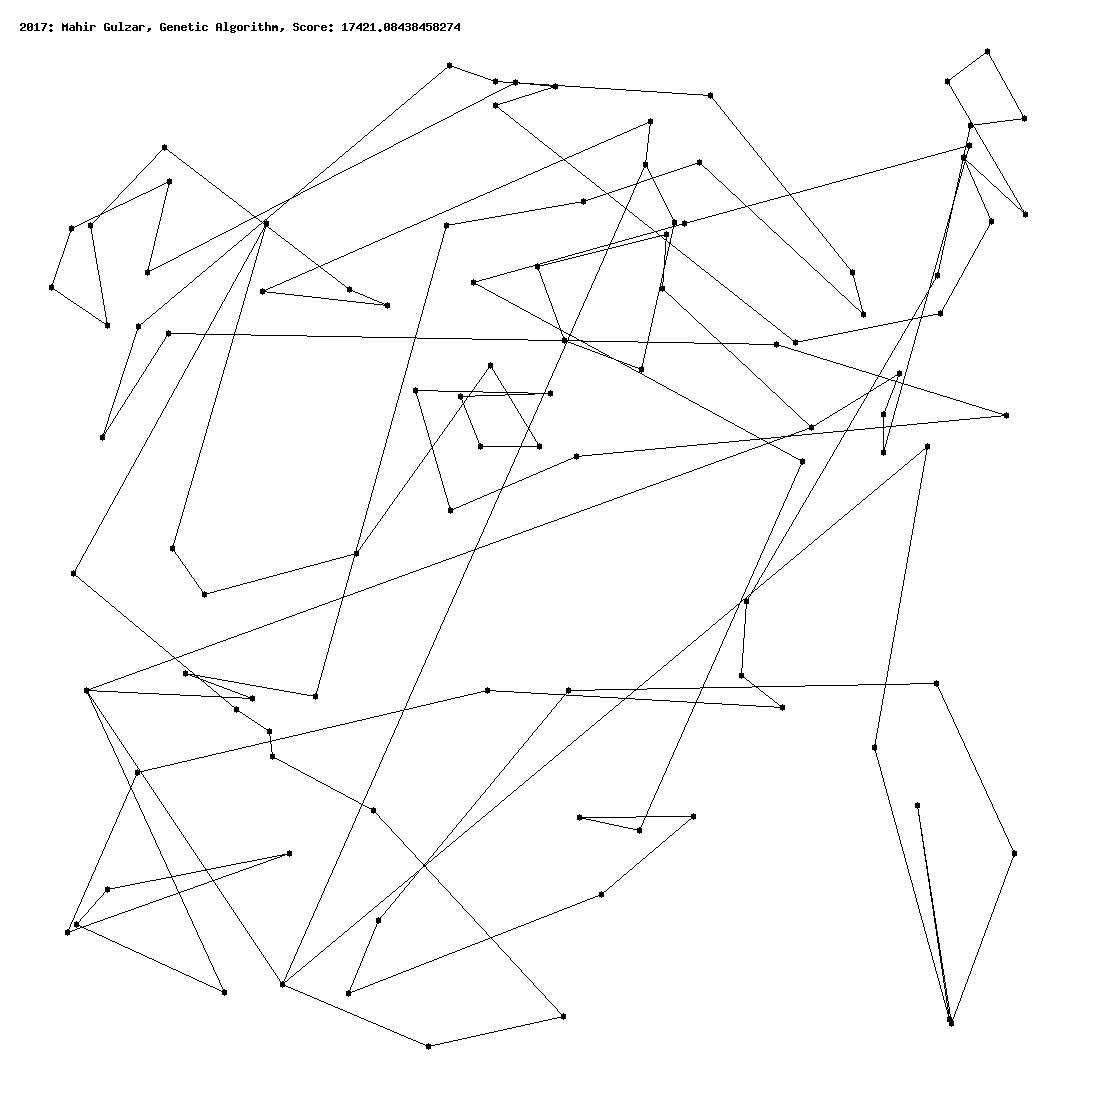

In [284]:
from IPython.display import Image
Image(filename='GA_100.png')